In [1]:
#Reading in CSV file
import pandas as pd
data = pd.read_csv('predict_outcome.csv')

In [2]:
#Checking in the shape
data.shape

(776503, 28)

In [4]:
#Dropping unneeded columns
data.drop(columns=['Unnamed: 0', 'p_throws', 'type', 'pitch_number.1','game_date', 'bb_type', 'spin_rate_deprecated',\
                  'pitch_number','description' ],inplace = True)

In [6]:
#Rename columns
data.rename(columns={"release_speed": 'Pitch_Velocity',
                    "launch_speed": "Exit_velocity",
                    "release_spin_rate": "Spin_Rate",
                    }, inplace = True)

In [7]:
#Dropping irrelevant events
data = data[(data.events!= 'field_error')
            & (data.events != 'hit_by_pitch')]

data.shape

(772797, 19)

In [8]:
#Determining what to do with null values
#When hit distance, launch speed, and launch angle are null - should be zero
data.head(10)

,pitch_name,Pitch_Velocity,events,hit_distance_sc,Exit_velocity,launch_angle,launch_speed_angle,effective_speed,hit_location,Spin_Rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,Cutter,90.4,out,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.065,-131.512,-3.298,-3.334,27.861,-30.520,-0.394417,0.329000,27.090708
1,Slider,81.5,ball,NaN,NaN,NaN,NaN,81.301,NaN,2293.0,-7.940,-118.390,-2.930,-0.977,18.714,-31.765,-0.224633,0.232967,28.134969
2,Curveball,77.1,ball,NaN,NaN,NaN,NaN,75.063,NaN,2543.0,-6.290,-112.149,-2.442,-4.252,25.153,-42.517,-0.607342,-1.004000,32.983139
3,Cutter,87.6,strike,NaN,NaN,NaN,NaN,86.856,NaN,2513.0,-5.742,-127.487,-2.031,0.472,27.321,-28.650,-0.089642,0.502433,28.687215
4,Cutter,86.2,strike,NaN,NaN,NaN,NaN,86.030,NaN,2422.0,-6.874,-125.377,-2.652,-1.359,24.380,-28.309,-0.248292,0.539700,28.097448
5,4-Seam Fastball,91.8,ball,NaN,NaN,NaN,NaN,90.941,NaN,2115.0,-9.252,-133.420,-2.692,10.444,31.375,-19.811,0.684125,1.187567,23.039216
6,Cutter,88.1,single,60.0,89.1,3.0,2.0,87.526,9.0,2465.0,-5.272,-128.235,-2.390,-1.473,28.023,-28.666,-0.253858,0.498133,27.979569
7,Curveball,77.2,ball,NaN,NaN,NaN,NaN,75.389,NaN,2514.0,-4.620,-112.364,-0.727,-5.753,24.912,-42.320,-0.771558,-0.973900,32.564767
8,Slider,80.0,ball,NaN,NaN,NaN,NaN,78.974,NaN,NaN,-1.072,-116.500,-0.560,-1.230,22.311,-35.829,-0.255250,-0.189867,NaN
9,4-Seam Fastball,89.5,foul,233.0,75.0,35.0,NaN,88.828,NaN,2438.0,-7.927,-130.104,-3.647,3.183,27.453,-22.159,0.128850,1.031333,27.240223


In [9]:
#instead of Nan going to put a zero for hit location
#Inputting correct values for null values 
import numpy as np 
data.hit_location = np.where(data.hit_location.isnull(), 0, data.hit_location)
data.Exit_velocity = np.where(data.Exit_velocity.isnull(), 0, data.Exit_velocity)
data.launch_speed_angle = np.where(data.launch_speed_angle.isnull(), 0, data.launch_speed_angle)
data.hit_distance_sc = np.where(data.hit_distance_sc.isnull(), 0 , data.hit_distance_sc)
data.launch_angle = np.where(data.launch_angle.isnull(), 0, data.launch_angle)


In [10]:
data.shape

(772797, 19)

In [11]:
data.isna().sum()

pitch_name             2072
Pitch_Velocity         1761
events                    0
hit_distance_sc           0
Exit_velocity             0
launch_angle              0
launch_speed_angle        0
effective_speed        9581
hit_location              0
Spin_Rate             28885
vx0                    1828
vy0                    1828
vz0                    1828
ax                     1828
ay                     1828
az                     1828
pfx_x                  1828
pfx_z                  1828
bauer_units           28885
dtype: int64

In [12]:
#Dropping remaining null values
data.dropna(inplace = True)

In [13]:
data.shape

(743066, 19)

In [14]:
#Label encoding pitch name for the computer to recognize that there are different pitches
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['pitch_name']= le.fit_transform(data['pitch_name'])

In [15]:
data.head(10)

,pitch_name,Pitch_Velocity,events,hit_distance_sc,Exit_velocity,launch_angle,launch_speed_angle,effective_speed,hit_location,Spin_Rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,4,90.4,out,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.065,-131.512,-3.298,-3.334,27.861,-30.520,-0.394417,0.329000,27.090708
1,7,81.5,ball,0.0,0.0,0.0,0.0,81.301,0.0,2293.0,-7.940,-118.390,-2.930,-0.977,18.714,-31.765,-0.224633,0.232967,28.134969
2,3,77.1,ball,0.0,0.0,0.0,0.0,75.063,0.0,2543.0,-6.290,-112.149,-2.442,-4.252,25.153,-42.517,-0.607342,-1.004000,32.983139
3,4,87.6,strike,0.0,0.0,0.0,0.0,86.856,0.0,2513.0,-5.742,-127.487,-2.031,0.472,27.321,-28.650,-0.089642,0.502433,28.687215
4,4,86.2,strike,0.0,0.0,0.0,0.0,86.030,0.0,2422.0,-6.874,-125.377,-2.652,-1.359,24.380,-28.309,-0.248292,0.539700,28.097448
5,1,91.8,ball,0.0,0.0,0.0,0.0,90.941,0.0,2115.0,-9.252,-133.420,-2.692,10.444,31.375,-19.811,0.684125,1.187567,23.039216
6,4,88.1,single,60.0,89.1,3.0,2.0,87.526,9.0,2465.0,-5.272,-128.235,-2.390,-1.473,28.023,-28.666,-0.253858,0.498133,27.979569
7,3,77.2,ball,0.0,0.0,0.0,0.0,75.389,0.0,2514.0,-4.620,-112.364,-0.727,-5.753,24.912,-42.320,-0.771558,-0.973900,32.564767
9,1,89.5,foul,233.0,75.0,35.0,0.0,88.828,0.0,2438.0,-7.927,-130.104,-3.647,3.183,27.453,-22.159,0.128850,1.031333,27.240223
10,0,85.6,out,300.0,91.6,37.0,3.0,85.222,9.0,1360.0,-6.415,-124.506,-0.322,11.561,26.242,-24.781,0.899833,0.872233,15.887850


# Scaling the Data

In [30]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = data.drop(columns=['events'], axis =1)
y = data.events
X = scaler.fit_transform(X)
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
#Going to run logistic regression to see if we get a better output
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier.fit(X_train,y_train)
print(f"R-sqaured training data: {classifier.score(X_train, y_train)}")
print(f"R-squared testing data: {classifier.score(X_test, y_test)}")

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


R-sqaured training data: 0.6368538253253639
R-squared testing data: 0.6356403451635652


In [34]:
#Looking at classification report, f1 score of .59
#Will use that to compare to other models
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        ball       0.53      0.97      0.68     67172
      double       0.39      0.17      0.24      2114
        foul       0.99      0.47      0.64     34045
    home_run       0.95      0.97      0.96      1369
         out       0.81      0.94      0.87     22151
      single       0.70      0.48      0.57      7239
      strike       0.81      0.21      0.34     51479
      triple       0.00      0.00      0.00       198

   micro avg       0.64      0.64      0.64    185767
   macro avg       0.65      0.53      0.54    185767
weighted avg       0.73      0.64      0.59    185767



In [35]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-sqaured training data: {model.score(X_train, y_train)}")
print(f"R-squared testing data: {model.score(X_test, y_test)}")

R-sqaured training data: 0.7155153696669113
R-squared testing data: 0.7143034015729381


In [36]:
modelpredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.65      0.86      0.74     67172
      double       0.58      0.23      0.32      2114
        foul       0.99      0.48      0.64     34045
    home_run       0.97      0.99      0.98      1369
         out       0.91      0.98      0.94     22151
      single       0.84      0.80      0.82      7239
      strike       0.63      0.57      0.60     51479
      triple       0.11      0.01      0.01       198

   micro avg       0.71      0.71      0.71    185767
   macro avg       0.71      0.61      0.63    185767
weighted avg       0.74      0.71      0.71    185767



In [ ]:
#Going to run for the SVM will reduced data

In [16]:
svm_data = data.loc[::5]
svm_data.shape

(148614, 19)

In [17]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_svm = svm_data.drop(columns=['events'], axis =1)
y = svm_data.events
X_svm = scaler.fit_transform(X_svm)
#train and test data
from sklearn.model_selection import train_test_split
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y, random_state=1)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo', class_weight= None)
clf.fit(X_svm_train, y_svm_train)
print(f"R-sqaured training data: {clf.score(X_svm_train, y_svm_train)}")
print(f"R-squared testing data: {clf.score(X_svm_test, y_svm_test)}")

R-sqaured training data: 0.6481876906513547
R-squared testing data: 0.6480594283253486


In [19]:
#looking at the classifciation report for the SVM
clf_predict = clf.predict(X_svm_test)
from sklearn.metrics import classification_report
print(classification_report( y_svm_test, clf_predict))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        ball       0.53      1.00      0.69     13433
      double       0.39      0.02      0.03       429
        foul       0.99      0.46      0.63      6904
    home_run       0.93      0.99      0.96       288
         out       0.84      0.96      0.89      4428
      single       0.74      0.62      0.68      1481
      strike       1.00      0.20      0.33     10153
      triple       0.00      0.00      0.00        38

   micro avg       0.65      0.65      0.65     37154
   macro avg       0.68      0.53      0.53     37154
weighted avg       0.79      0.65      0.60     37154



In [24]:
predict_counts

ball        25264
out          5081
foul         3228
strike       2004
single       1253
home_run      306
double         18
Name: Prediction, dtype: int64

<Figure size 864x576 with 0 Axes>

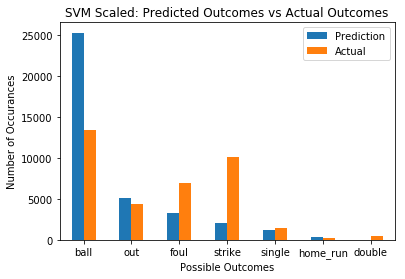

In [26]:
#Creating a datafram and graphing actual results vs the models prediction
import matplotlib.pyplot as plt
clf_results = pd.DataFrame({"Prediction": clf_predict,
                           "Actual": y_svm_test})
predict_counts = clf_results.Prediction.value_counts()
predict_df = predict_counts.to_frame()
actual_counts = clf_results.Actual.value_counts()
actual_df = actual_counts.to_frame()
graph_items = pd.merge( predict_df, actual_df,left_index=True, right_index=True ,suffixes= ('predict', 'actual'))

#Bar graph of predicted v Actual
plt.figure(figsize=(12,8))
graph_items.plot.bar(rot=0)
plt.xlabel('Possible Outcomes')
plt.ylabel('Number of Occurances')
plt.title('SVM Scaled: Predicted Outcomes vs Actual Outcomes')
plt.savefig('svm_scaled.png')

# Testing models with a Subset of the data

In [10]:
#Going to initially test models with a subset of the dataset
#Using 14,023 rows to test models
test_data = data.loc[:730000:50]
test_data.shape

(13957, 19)

In [11]:
#Breaking down into X and Y values to feed to model
X = test_data.drop(columns=['events'], axis =1)
y = test_data.events

Not going to scale the data initially

In [12]:
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Running a logistic regression as a baseline

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier.fit(X_train,y_train)

#Get R-squared value for training and testing data
print(f"R-sqaured training data: {classifier.score(X_train, y_train)}")
print(f"R-squared testing data: {classifier.score(X_test, y_test)}")

R-sqaured training data: 0.6419222317760581
R-squared testing data: 0.6286532951289399


/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


The logistic regression returned R-squared values for both training and testing data of .63. A respectable baseline.
Could graph feature importance next.

In [14]:
#Looking at classification report, f1 score of .59
#Will use that to compare to other models
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        ball       0.52      0.98      0.68      1250
      double       0.33      0.27      0.30        37
        foul       0.99      0.46      0.63       652
    home_run       0.97      0.97      0.97        31
         out       0.80      0.91      0.85       400
      single       0.68      0.47      0.56       154
      strike       0.85      0.20      0.32       962
      triple       0.00      0.00      0.00         4

   micro avg       0.63      0.63      0.63      3490
   macro avg       0.64      0.53      0.54      3490
weighted avg       0.74      0.63      0.59      3490



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing a gradient boosting model next

In [15]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-sqaured training data: {model.score(X_train, y_train)}")
print(f"R-squared testing data: {model.score(X_test, y_test)}")

R-sqaured training data: 0.7554218018534442
R-squared testing data: 0.6919770773638968


Gradient Boosting produced an improved training score with a .75 but it dipped when testing the data to .698.

In [17]:
modelpredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.61      0.87      0.72      1250
      double       0.42      0.30      0.35        37
        foul       0.98      0.47      0.63       652
    home_run       0.97      1.00      0.98        31
         out       0.90      0.97      0.93       400
      single       0.83      0.73      0.78       154
      strike       0.61      0.51      0.55       962
      triple       0.00      0.00      0.00         4

   micro avg       0.69      0.69      0.69      3490
   macro avg       0.67      0.60      0.62      3490
weighted avg       0.73      0.69      0.68      3490



With a f1 score of .69, the gradient boosting model looks to be superior than the logistic regression initially.

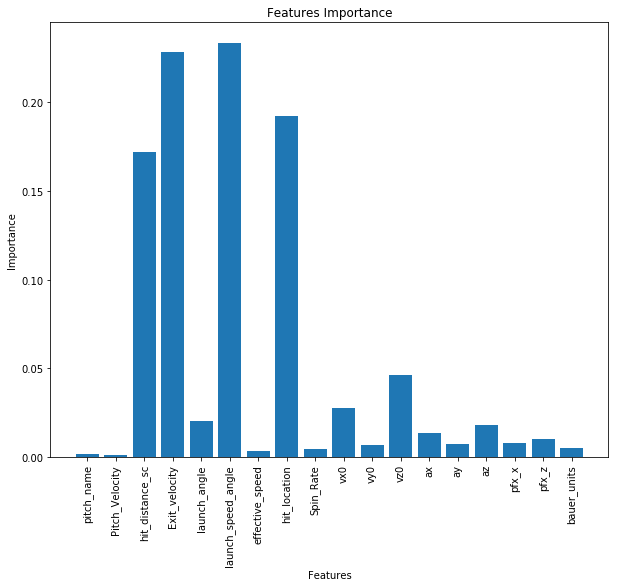

In [19]:
#Feature important breakdown of the model
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10, 8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

Testing Support Vector Machines 

In [20]:
#SVM
#Not much of a difference between ovo and ovr
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo', class_weight= None, )
clf.fit(X_train, y_train)
print(f"R-sqaured training data: {clf.score(X_train, y_train)}")
print(f"R-squared testing data: {clf.score(X_test, y_test)}")

R-sqaured training data: 0.5475303334288717
R-squared testing data: 0.5255014326647565


The SVM returns an R-squared value of .52 

In [21]:
#looking at the classifciation report for the SVM
clf_predict = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, clf_predict))

              precision    recall  f1-score   support

        ball       0.49      0.97      0.65      1250
      double       0.00      0.00      0.00        37
        foul       0.75      0.27      0.40       652
    home_run       0.57      0.42      0.48        31
         out       0.60      0.87      0.71       400
      single       0.61      0.35      0.45       154
      strike       0.40      0.03      0.05       962
      triple       0.00      0.00      0.00         4

   micro avg       0.53      0.53      0.53      3490
   macro avg       0.43      0.36      0.34      3490
weighted avg       0.53      0.53      0.43      3490



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 864x576 with 0 Axes>

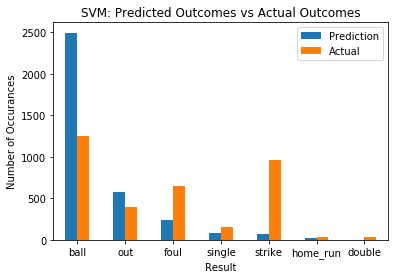

In [75]:
#Creating a datafram and graphing actual results vs the models prediction
clf_results = pd.DataFrame({"Prediction": clf_predict,
                           "Actual": y_test})
predict_counts = clf_results.Prediction.value_counts()
predict_df = predict_counts.to_frame()
actual_counts = clf_results.Actual.value_counts()
actual_df = actual_counts.to_frame()
graph_items = pd.merge( predict_df, actual_df,left_index=True, right_index=True ,suffixes= ('predict', 'actual'))

#Bar graph of predicted v Actual
plt.figure(figsize=(12,8))
graph_items.plot.bar(rot=0)
plt.xlabel('Result')
plt.ylabel('Number of Occurances')
plt.title('SVM Subset: Predicted Outcomes vs Actual Outcomes')
plt.show()

With an  f1 score of .43, the SVM performed the worst on the subsetted dataset.

# Testing the Whole Dataset

In [12]:
#Breaking down into X and Y values to feed to model
X = data.drop(columns=['events'], axis =1)
y = data.events

In [15]:
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Logistic Regression with full dataset

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier.fit(X_train,y_train)

#Get R-squared value for training and testing data
print(f"R-sqaured training data: {classifier.score(X_train, y_train)}")
print(f"R-squared testing data: {classifier.score(X_test, y_test)}")

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


R-sqaured training data: 0.6342763661951205
R-squared testing data: 0.6335162126829686


Performed the same as with the subsetted dataset

In [17]:
#Looking at classification report, f1 score of .59
#Will use that to compare to other models
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        ball       0.53      0.97      0.68     67064
      double       0.40      0.18      0.25      2134
 field_error       0.00      0.00      0.00       422
        foul       0.99      0.48      0.64     33820
hit_by_pitch       0.00      0.00      0.00       407
    home_run       0.94      0.98      0.96      1390
         out       0.80      0.94      0.86     22106
      single       0.70      0.49      0.58      7210
      strike       0.82      0.21      0.34     51875
      triple       0.00      0.00      0.00       216

   micro avg       0.63      0.63      0.63    186644
   macro avg       0.52      0.42      0.43    186644
weighted avg       0.73      0.63      0.59    186644



The same f1 score as well

In [18]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-sqaured training data: {model.score(X_train, y_train)}")
print(f"R-squared testing data: {model.score(X_test, y_test)}")

R-sqaured training data: 0.7137057958927082
R-squared testing data: 0.713304472685969


The gradient boosting model produced a R-squared score of .71. 

In [19]:
modelpredict = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, modelpredict))

              precision    recall  f1-score   support

        ball       0.65      0.85      0.74     67064
      double       0.56      0.23      0.33      2134
 field_error       1.00      0.01      0.01       422
        foul       0.99      0.48      0.64     33820
hit_by_pitch       0.15      0.01      0.03       407
    home_run       0.97      0.99      0.98      1390
         out       0.89      0.98      0.93     22106
      single       0.83      0.81      0.82      7210
      strike       0.63      0.59      0.61     51875
      triple       0.09      0.00      0.01       216

   micro avg       0.71      0.71      0.71    186644
   macro avg       0.68      0.50      0.51    186644
weighted avg       0.74      0.71      0.70    186644



An f1 score of .7

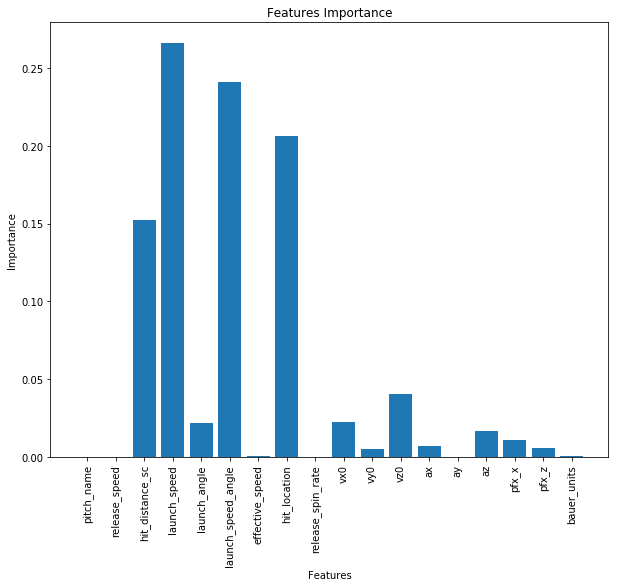

In [21]:
#Feature important breakdown of the model
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10, 8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In looking at the feature importance, the model leans heavily on launch speed. Considering dropping launch speed angle since that is an interpretation. 

Suprised that pitch velocity is almost irrelevant. 

An SVM model can't handle more than 200,000 rows so going to create a subset for the model

In [13]:
#186,644 rows for the SVM model
#getting stuck
svm_data = data.loc[::5]
svm_data.shape

(148614, 19)

In [14]:
#Breaking down into X and Y values to feed to model
X_svm = svm_data.drop(columns=['events'], axis =1)
y_svm = svm_data.events
#train and test data
from sklearn.model_selection import train_test_split
X_svm_train, X__svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, random_state=1)

In [15]:
#SVM
#Make sure that gamma = 'scale'
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo', class_weight= None, )
clf.fit(X_svm_train, y_svm_train)
print(f"R-sqaured training data: {clf.score(X_svm_train, y_svm_train)}")
print(f"R-squared testing data: {clf.score(X__svm_test, y_svm_test)}")

R-sqaured training data: 0.605481787188229
R-squared testing data: 0.6028691392582225


In [16]:
#looking at the classifciation report for the SVM
clf_predict = clf.predict(X__svm_test)
from sklearn.metrics import classification_report
print(classification_report( y_svm_test, clf_predict))

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        ball       0.51      1.00      0.68     13433
      double       0.10      0.00      0.00       429
        foul       0.93      0.41      0.57      6904
    home_run       0.82      0.88      0.85       288
         out       0.75      0.93      0.83      4428
      single       0.70      0.50      0.58      1481
      strike       1.00      0.10      0.18     10153
      triple       0.00      0.00      0.00        38

   micro avg       0.60      0.60      0.60     37154
   macro avg       0.60      0.48      0.46     37154
weighted avg       0.76      0.60      0.53     37154

